In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from dredFISH.Design import PNMF
from dredFISH.Analysis import basicu
from dredFISH.Analysis.__init__plots import * 

import importlib
importlib.reload(PNMF)


<module 'dredFISH.Design.PNMF' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/PNMF.py'>

In [2]:
prj_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/'
dat_dir = prj_dir + 'data/'
res_dir = prj_dir + 'data_dump/'
fig_dir = prj_dir + 'figures/'

# data
scrna_genes_path = '/bigstore/GeneralStorage/fangming/projects/dredfish/data/rna/scrna_ss_ctxhippo_a_exon_DPNMF_genes_matrix.h5ad'

In [3]:
%%time
# allen scrna matrix
adata = anndata.read_h5ad(scrna_genes_path) # library size normed (no log)
adata

CPU times: user 584 ms, sys: 8 s, total: 8.59 s
Wall time: 8.97 s


AnnData object with n_obs × n_vars = 73347 × 5576
    obs: 'donor_sex_id', 'donor_sex_label', 'donor_sex_color', 'region_id', 'region_label', 'region_color', 'platform_label', 'cluster_order', 'cluster_label', 'cluster_color', 'subclass_order', 'subclass_label', 'subclass_color', 'neighborhood_id', 'neighborhood_label', 'neighborhood_color', 'class_order', 'class_label', 'class_color', 'exp_component_name', 'external_donor_name_label', 'full_genotype_label', 'facs_population_plan_label', 'injection_roi_label', 'injection_materials_label', 'injection_method_label', 'injection_type_label', 'full_genotype_id', 'full_genotype_color', 'external_donor_name_id', 'external_donor_name_color', 'facs_population_plan_id', 'facs_population_plan_color', 'injection_materials_id', 'injection_materials_color', 'injection_method_id', 'injection_method_color', 'injection_roi_id', 'injection_roi_color', 'injection_type_id', 'injection_type_color', 'cell_type_accession_label', 'cell_type_alias_label', 'cel

In [4]:
%%time
X = np.array(adata.X.todense()).copy() # already library size normalized
logX = np.log10(X+1)

CPU times: user 8.3 s, sys: 27.5 s, total: 35.8 s
Wall time: 36 s


In [19]:
%%time

# run PNMF logtrans -- recommended by them
# w_pca, rec_pca = PNMF.get_PNMF(logX.T, init='pca', k=24, verbose=True, report_stride=2)
# w_nrm, rec_nrm = PNMF.get_PNMF(logX.T, init='normal', k=24, verbose=True, report_stride=2)
# w_uni, rec_uni = PNMF.get_PNMF(logX.T, init='uniform', k=24, verbose=True, report_stride=2)

0 0.2757458396052961
2 0.011595110843477807
4 0.0007217032001438951
6 4.767567726136988e-05
8 7.550167952249812e-06
0 0.2659906104839008
2 0.00557885184847635
4 0.0003579805207918136
6 2.2967868374413218e-05
0 0.22675528367089934
2 0.004464164522751134
4 0.00028106858679152963
6 1.796332587818099e-05
CPU times: user 17min 48s, sys: 2min 52s, total: 20min 41s
Wall time: 1min 28s


In [29]:
# # # %%time
# # # # run PNMF orig -- what we do and have to do
# w_pca, rec_pca = PNMF.get_PNMF(X.T, init='pca', k=24, verbose=True, report_stride=30)
# w_nrm, rec_nrm = PNMF.get_PNMF(X.T, init='normal', k=24, verbose=True, report_stride=30)
# w_uni, rec_uni = PNMF.get_PNMF(X.T, init='uniform', k=24, verbose=True, report_stride=30)

0 0.347165302717233
30 0.0015048035963532436
60 0.000657530702882228
90 0.0003361771994364639
120 0.0003321588149517475
150 0.0003286962492868306
180 0.0001809937897576117
210 0.0001481038223673549
240 0.00011362081101290531
270 7.126668033071663e-05
300 7.942867199574322e-05
330 0.0003247557894599275
360 5.645859955966462e-05
390 3.806213058482957e-05
420 3.1518390965212806e-05
450 2.4871413963363032e-05
480 1.9930950523786885e-05
510 1.7487357305350512e-05
540 1.588463681465057e-05
570 1.4418416961578745e-05
600 1.2672902801678986e-05
630 1.0880230311707698e-05
0 0.5373017733144454
30 0.0001318847787840562
60 0.0005194178663395148
90 0.0009471767980452247
120 0.0002036987759617921
150 0.00019559514058542564
180 0.00013144743436838122
210 0.00013009764455084854
240 0.000504781990324593
270 8.846371310091753e-05
300 7.188269042083618e-05
330 5.581914074800741e-05
360 4.936215038049902e-05
390 4.60009405895377e-05
420 4.522632648165804e-05
450 4.647249506206852e-05
480 4.802778266919528

In [30]:
# plt.plot(rec_pca[:,0], rec_pca[:,2], label='pca')
# plt.plot(rec_nrm[:,0], rec_nrm[:,2], label='random normal')
# plt.plot(rec_uni[:,0], rec_uni[:,2], label='random uniform')
# plt.xlabel('Iterations')
# plt.ylabel('Error (MSE)')
# plt.legend()

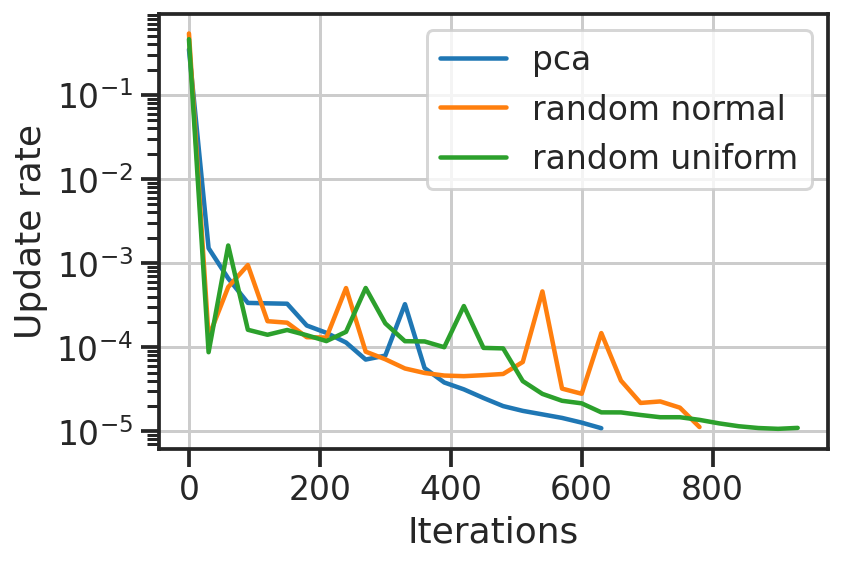

In [31]:
plt.plot(rec_pca[:,0], rec_pca[:,1], label='pca')
plt.plot(rec_nrm[:,0], rec_nrm[:,1], label='random normal')
plt.plot(rec_uni[:,0], rec_uni[:,1], label='random uniform')
plt.xlabel('Iterations')
plt.ylabel('Update rate')
plt.legend()
plt.yscale('log')

In [32]:
# wnew, rows, cols = basicu.diag_matrix_rows(w)

# fig, ax = plt.subplots(figsize=(8,10))
# sns.heatmap(wnew>(1.0/120)*np.max(wnew), 
#             ax=ax, 
#             cmap='rocket_r', 
#             cbar_kws=dict(shrink=0.5),
#            )
# plt.show()

In [33]:
def plot(w, ax, vmax=None, reorder=True):
    if reorder:
        wnew, rows, cols = basicu.diag_matrix_rows(w)
    else:
        wnew = w
        
    sns.heatmap(
                # np.log10(wnew+1), 
                wnew,
                ax=ax, 
                cmap='rocket_r', 
                cbar_kws=dict(shrink=0.5),
                vmax=vmax,
               )

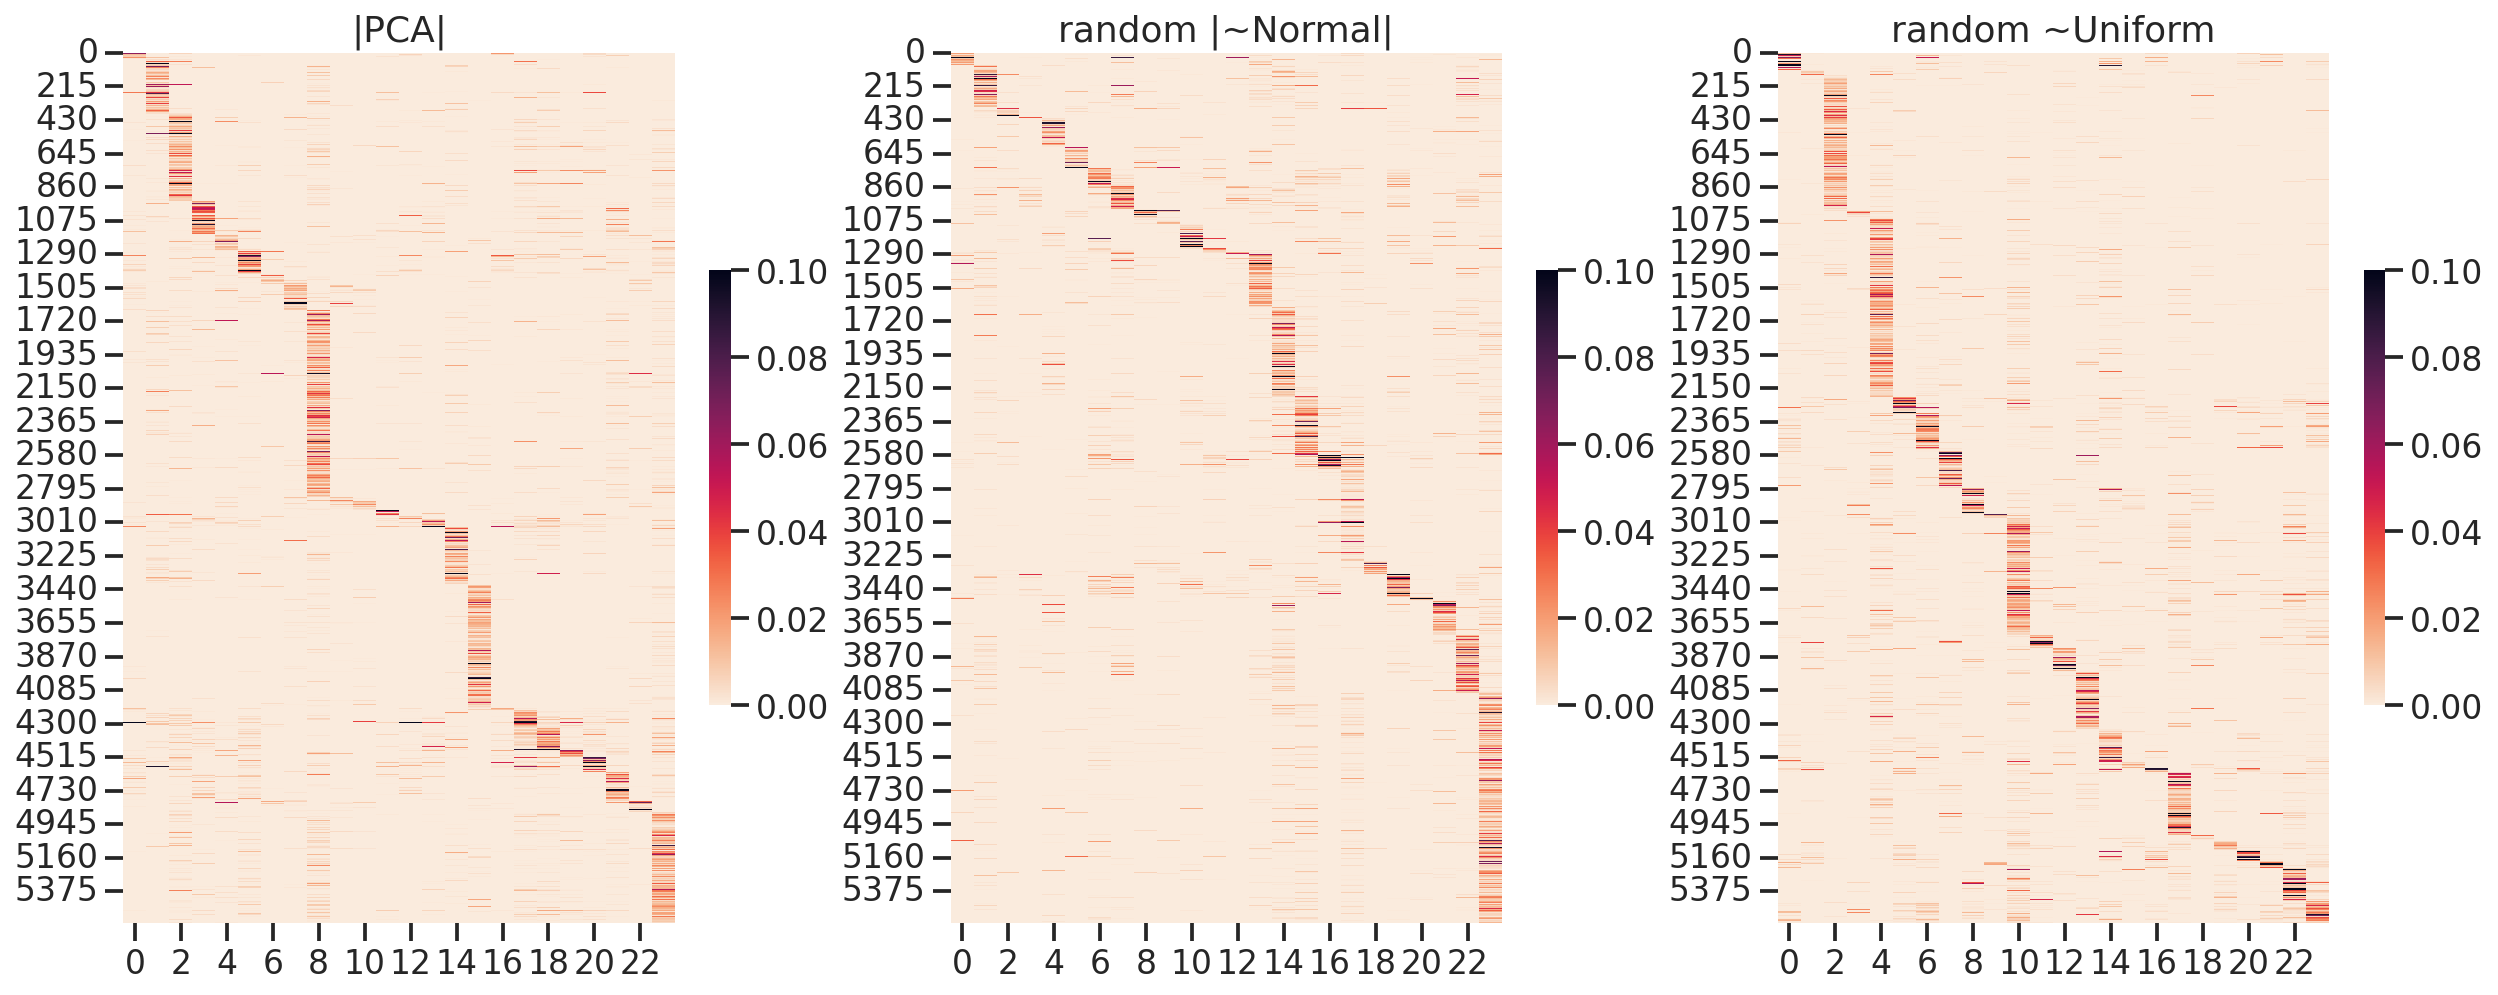

In [34]:
vmax = 0.1
# vmax = 0.03
fig, axs = plt.subplots(1, 3, figsize=(7*3,8))
ax = axs[0]
plot(w_pca, ax, vmax=vmax)
ax.set_title('|PCA|')
ax = axs[1]
plot(w_nrm, ax, vmax=vmax)
ax.set_title('random |~Normal|')
ax = axs[2]
plot(w_uni, ax, vmax=vmax)
ax.set_title('random ~Uniform')
plt.show()

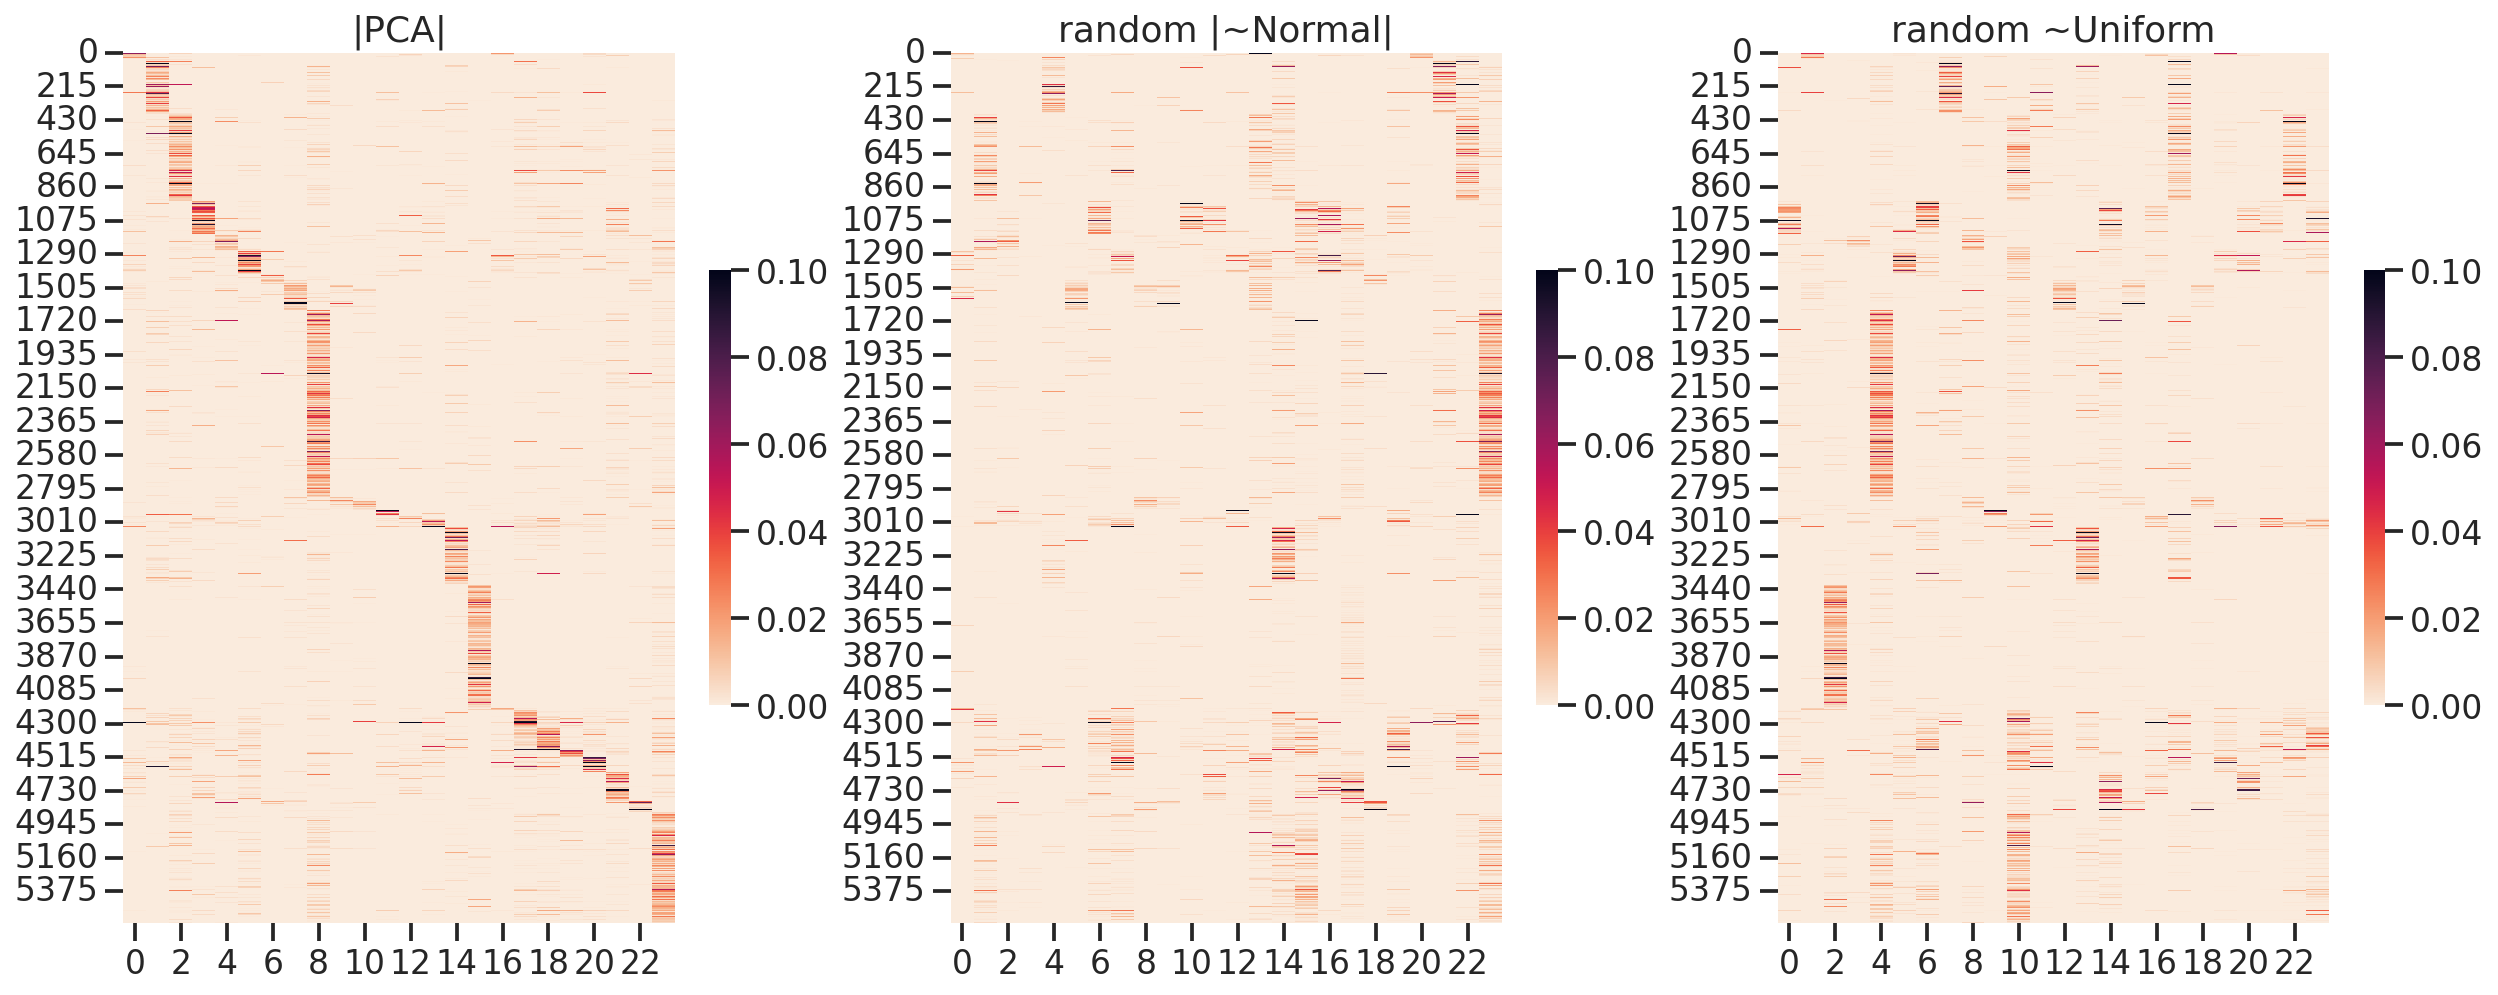

In [35]:
vmax = 0.1
# vmax = 0.03
fig, axs = plt.subplots(1, 3, figsize=(7*3,8))
ax = axs[0]
# set the order
wnew, rows, cols = basicu.diag_matrix_rows(w_pca)
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('|PCA|')

ax = axs[1]
wnew = w_nrm[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random |~Normal|')

ax = axs[2]
wnew = w_uni[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random ~Uniform')

plt.show()

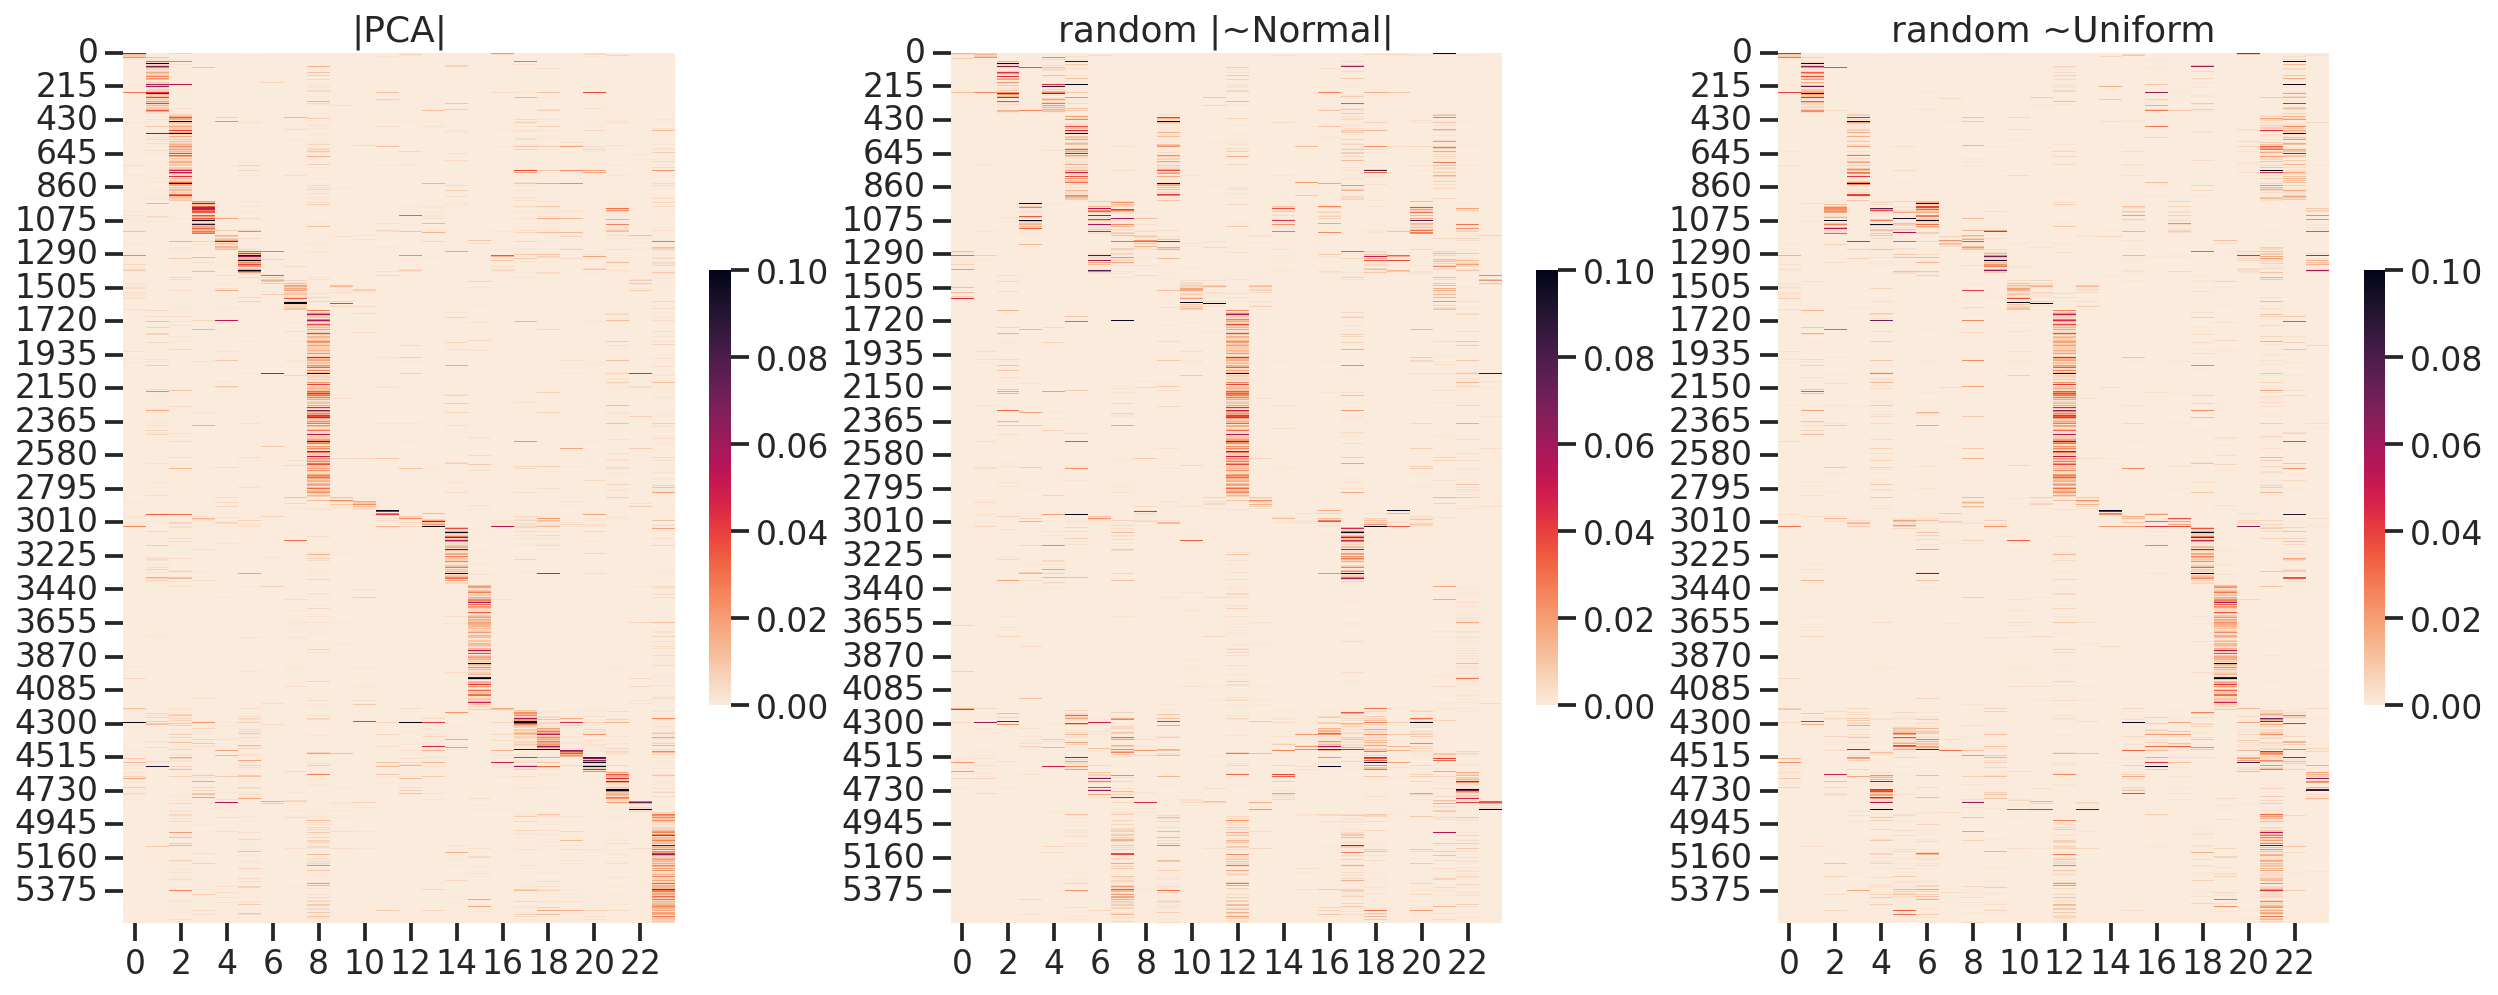

In [36]:
vmax = 0.1
# vmax = 0.03
fig, axs = plt.subplots(1, 3, figsize=(7*3,8))
ax = axs[0]
# set the order
wnew, rows, cols = basicu.diag_matrix_rows(w_pca)
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('|PCA|')

ax = axs[1]
wnew = w_nrm[rows]
wnewt, _, _ = basicu.diag_matrix_rows(wnew.T)
wnew = wnewt.T
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random |~Normal|')

ax = axs[2]
wnew = w_uni[rows]
wnewt, _, _ = basicu.diag_matrix_rows(wnew.T)
wnew = wnewt.T
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random ~Uniform')

plt.show()

# plot distribution

In [13]:
k = 24
pm = sns.color_palette('rocket', n_colors=k)
pm

[(0.0618531, 0.04504866, 0.13804929),
 (0.11813947, 0.06961499, 0.17821272),
 (0.17489524, 0.08848235, 0.2190294),
 (0.23334047, 0.10263737, 0.25697736),
 (0.29977678, 0.11356089, 0.29254823),
 (0.36196644, 0.1195413, 0.31852037),
 (0.42569057, 0.12178916, 0.33806605),
 (0.49083761, 0.11998161, 0.35111537),
 (0.56405586, 0.11235265, 0.35804813),
 (0.63139686, 0.10067417, 0.35664819),
 (0.69803757, 0.08897226, 0.3462986),
 (0.76145589, 0.09050716, 0.32637117),
 (0.82341472, 0.12535343, 0.2963705),
 (0.87079129, 0.17982114, 0.26797378),
 (0.90848638, 0.24568473, 0.24598324),
 (0.93262051, 0.3215093, 0.24606461),
 (0.94727016, 0.4055909, 0.27902322),
 (0.95510255, 0.47787236, 0.32862553),
 (0.96004345, 0.54657593, 0.3870292),
 (0.96298491, 0.6126247, 0.45145074),
 (0.96467922, 0.68283846, 0.53000231),
 (0.96612013, 0.74451182, 0.60871954),
 (0.96935926, 0.80395415, 0.69383201),
 (0.97441222, 0.86238689, 0.78015619)]

In [14]:
pmat = pd.DataFrame(w)
cutoff = 1/120*np.max(pmat.values)

fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    _x = _x[_x > cutoff]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('PNMF matrix structure \n(Weights < 1/120 max value are ignored)')
ax.legend(ncol=3, title='measurements')

NameError: name 'w' is not defined